In [123]:
import webbrowser as wb
wb.open("https://www.scaler.com/academy/mentee-dashboard/class/122247/project/problems/19753?navref=cl_tt_crd_sl")
path=!cd
import os
os.startfile(path[0]+'\\Other')

### Business and Problem Understanding

Problem Statement
- Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech
leaders and subject matter experts.
- The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to
the latest technologies. It is a product by InterviewBit.
- You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to
work for from the Scaler database.
- You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company,
and other features. Ideally, these clusters should have similar characteristics.

Data Dictionary:
- 'Unnamed 0'- Index of the dataset
- Email_hash- Anonymised Personal Identifiable Information (PII)
- Company_hash- Current employer of the learner
- orgyear- Employment start date
- CTC- Current CTC
- Job_position- Job profile in the company
- CTC_updated_year: Year in which CTC got updated (Yearly increments, Promotions)

Concept Used:
- Manual Clustering
- Unsupervised Clustering - K- means, Hierarchical Clustering


Problem Statement and Data Analysis Approch

We are given with the information for a segment of learners and are asked to cluster them on the basis of their job profile, company and other features. The created clusters should have similar characteristics.
The shape of the dataset looks like we have around 2 lakh rows with 7 columns. There are few null values and categorical values present in the data.
By describing the data, we get to know information about statistics of the data.
From the data, it can be referred that there are few outliers present to the data that should be removed.
As there are few null value rows in the dataset, hence need to fill the missing values.
        2. Hypothesis Testing
There are few duplicate values present in the dataset after performing different steps, that are removed.
There are some missing values present in the dataset and hence used the KNN Imputer to fill the missing values.
For cleaning the company names, I have used regular expression to make them more proper.
Data Encoding was done to different features.

        3.  Manual Clustering
Created Designation Flags. ( Designation: Salary an employee is getting wrt salary in the same Company, Job_Position & Years of Experience )
Created Class Flags. ( Class: Salary an employee is getting wrt the salary in the same Company & Job_Position )
Created Tier Flags. (  Tier: Salary an employee is getting wrt the salary in the same Company )
       4. Unsupervised learning
Checked for the cluster tendency using Hopkins score and Silhouette score.
Hopkins Score - A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.
Created K-means clustering by finding the required number of clusters using Elbow method.
Created Hierarchial Clustering by finding appropriate clusters through dendograms and built a agglomerative clustering based model.

      5. Insights and Recommendations
           Below example points can be answered from the built model. 
Macro Analysis
1. Top 10 employees (earning more than most of the employees in the company) (tier 1) 
Top 10 employees of data science in Amazon / TCS etc earning more than their peers (class 1).
Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers (class 3) 
Bottom 10 employees (earning less than most of the employees in the company) (tier 3) 
Top 10 employees in the amazon- data science- having 5/6/7 years of experience earning more than their peers 
Micro Analysis
Top 10 companies (basis on their offered CTC) - grouped_c, sort by descending, head(10) 
Top 2 positions in every company (basis on their offered CTC) - grouped_c_j, sort by descending, head(10)

Drive Link for code - https://drive.google.com/file/d/1KnC5Rkr3s3FjTPRMskEcJMPYfWRsLmIj/view?usp=sharing


### Exploratory Data Analysis

In [373]:
import pandas as pd
df = pd.read_csv('Data_Scaler.csv')
df

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...,...
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0


In [374]:
df.columns

Index(['Unnamed: 0', 'company_hash', 'email_hash', 'orgyear', 'ctc',
       'job_position', 'ctc_updated_year'],
      dtype='object')

In [375]:
df.drop(columns=['Unnamed: 0', 'email_hash'], inplace=True)

In [376]:
df.rename(columns={'orgyear':'org_join_year'}, inplace=True)

In [377]:
df['ctc']=(df['ctc']/10**5).round(2)

In [378]:
df_cleaned = df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   org_join_year     205757 non-null  float64
 2   ctc               205843 non-null  int64  
 3   job_position      153281 non-null  object 
 4   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.9+ MB


In [129]:
(df.isna().mean() * 100).round(2)

company_hash         0.02
org_join_year        0.04
ctc                  0.00
job_position        25.53
ctc_updated_year     0.00
dtype: float64

In [7]:
df.nunique()

company_hash        37299
org_join_year          77
ctc                  3360
job_position         1017
ctc_updated_year        7
dtype: int64

In [8]:
df.describe()

,org_join_year,ctc,ctc_updated_year
count,205757.000000,2.058430e+05,205843.000000
mean,2014.882750,2.271685e+06,2019.628231
std,63.571115,1.180091e+07,1.325104
min,0.000000,2.000000e+00,2015.000000
25%,2013.000000,5.300000e+05,2019.000000
50%,2016.000000,9.500000e+05,2020.000000
75%,2018.000000,1.700000e+06,2021.000000
max,20165.000000,1.000150e+09,2021.000000


In [9]:
df.describe(include='object')

,company_hash,job_position
count,205799,153281
unique,37299,1017
top,nvnv wgzohrnvzwj otqcxwto,Backend Engineer
freq,8337,43554


In [44]:
df[df['org_join_year']>2025]['org_join_year'].value_counts()

2026.0     9
2031.0     5
2029.0     5
2028.0     4
20165.0    2
2106.0     1
2101.0     1
2107.0     1
2027.0     1
2204.0     1
Name: org_join_year, dtype: int64

In [45]:
df[df['org_join_year']<1970]['org_join_year'].value_counts()

0.0       17
3.0        6
91.0       3
2.0        3
5.0        2
1.0        2
6.0        2
208.0      1
209.0      1
206.0      1
4.0        1
83.0       1
38.0       1
1900.0     1
201.0      1
200.0      1
Name: org_join_year, dtype: int64

In [46]:
df = df[df['org_join_year'].between(1997, 2025)]

In [13]:
df['ctc'].min(), df['ctc'].max()

(2, 1000150000)

In [14]:
df["ctc"].quantile(0.01)

37000.0

In [15]:
df["ctc"].quantile(0.99)

12500000.0

In [51]:
df[df['ctc']<df["ctc"].quantile(0.01)]['ctc'].value_counts()

10000    156
20000    120
30000     94
12000     64
15000     57
        ... 
28200      1
4700       1
6400       1
15100      1
33740      1
Name: ctc, Length: 244, dtype: int64

In [16]:
df[df['ctc']>df["ctc"].quantile(0.99)]['ctc'].value_counts()

100000000    528
200000000    374
20000000      55
50000000      47
15000000      31
            ... 
31300000       1
43500000       1
80800000       1
58900000       1
67300000       1
Name: ctc, Length: 408, dtype: int64

In [17]:
Q1 = df["ctc"].quantile(0.25)
Q3 = df["ctc"].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print(Q1,Q3,IQR,lower,upper)

530000.0 1700000.0 1170000.0 -1225000.0 3455000.0


### Outliers Treatment

income = [40000, 120000]
age = [21, 21]

income = 120000 may not be an outlier univariately, but for a 21-year-old, it could be suspicious.

IQR/Z-Score can’t detect this — but LOF or IsolationForest can, because they consider relationships between features.



Use visual + rule-based + ML hybrid approach

Visualize year with boxplot or value counts.

Combine rule-based filtering for obviously invalid entries (like year 20225) before ML-based outlier detection.

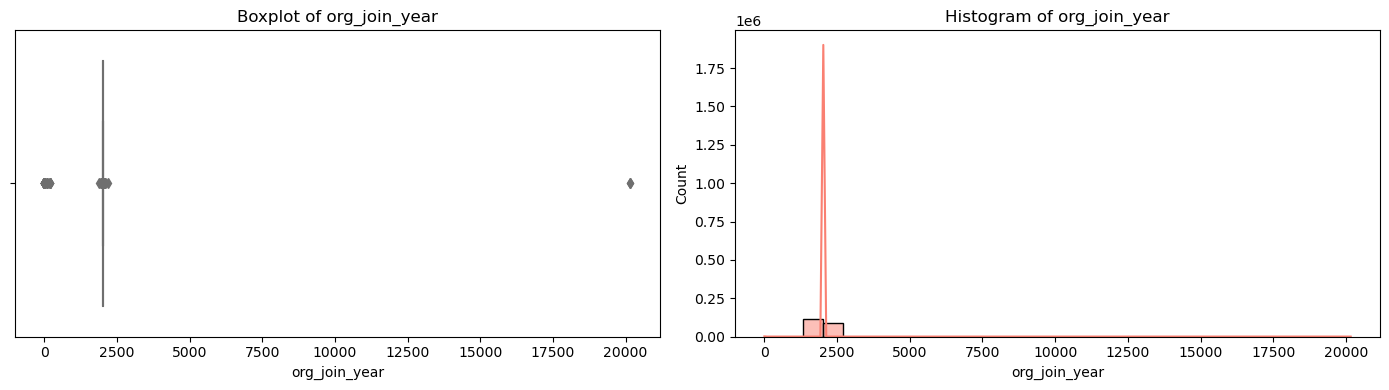

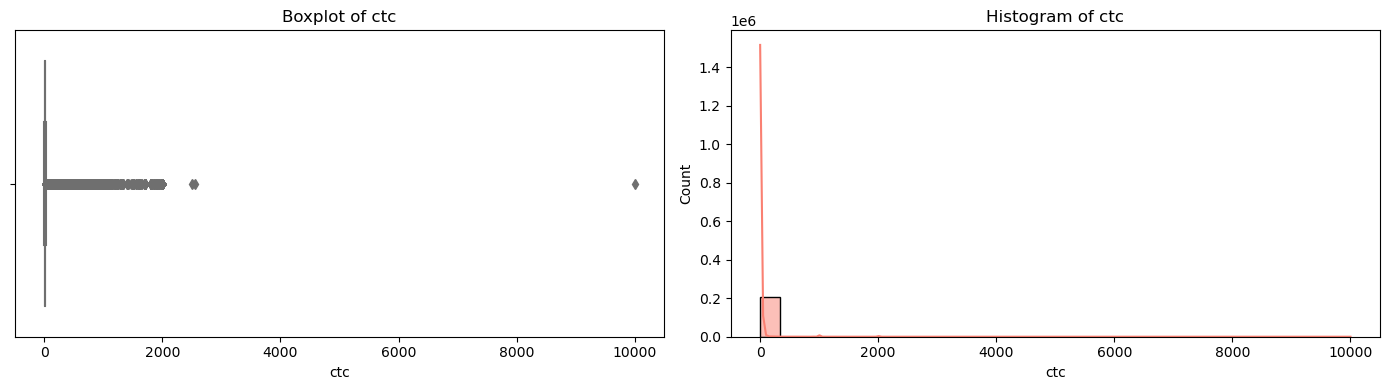

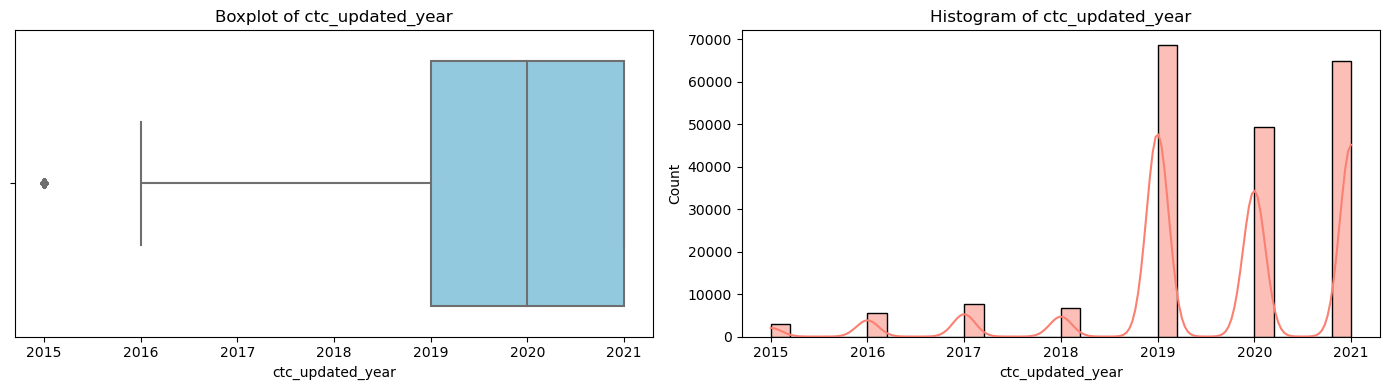

In [308]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include='number').columns

for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[0], color='skyblue')
    axes[0].set_title(f'Boxplot of {col}')

    # Histogram
    sns.histplot(df[col], bins=30, kde=True, ax=axes[1], color='salmon')
    axes[1].set_title(f'Histogram of {col}')

    plt.tight_layout()
    plt.show()

In [312]:
df.describe().round(2)

,org_join_year,ctc,ctc_updated_year
count,205757.00,205843.00,205843.00
mean,2014.88,22.72,2019.63
std,63.57,118.01,1.33
min,0.00,0.00,2015.00
25%,2013.00,5.30,2019.00
50%,2016.00,9.50,2020.00
75%,2018.00,17.00,2021.00
max,20165.00,10001.50,2021.00


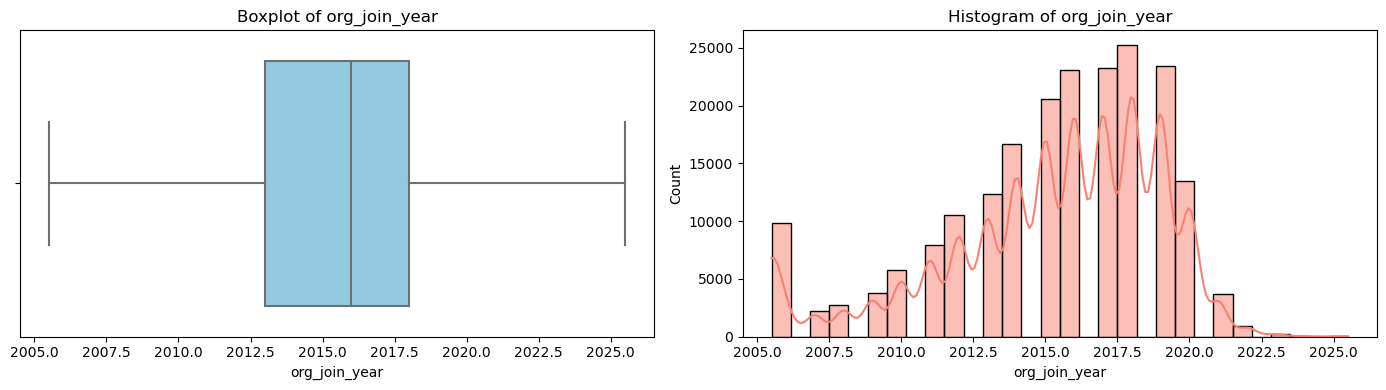

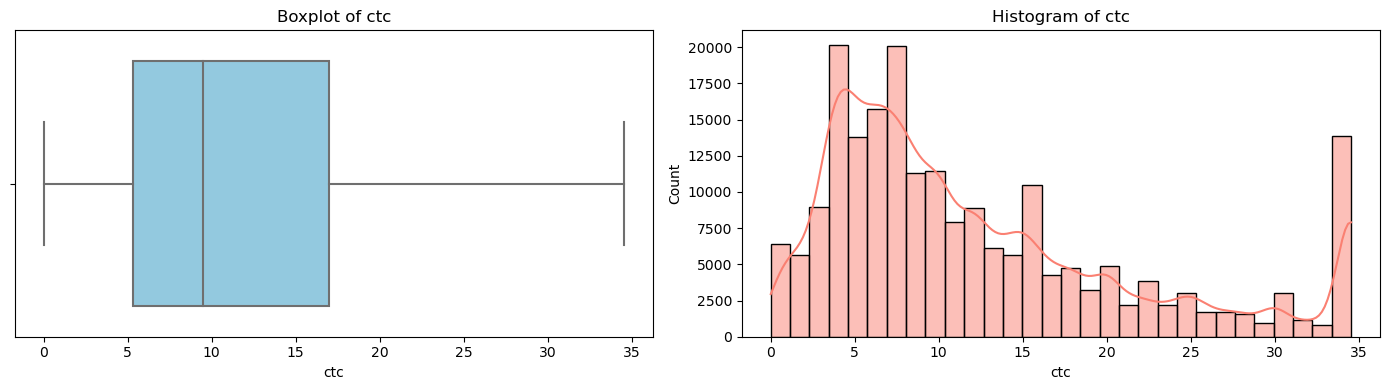

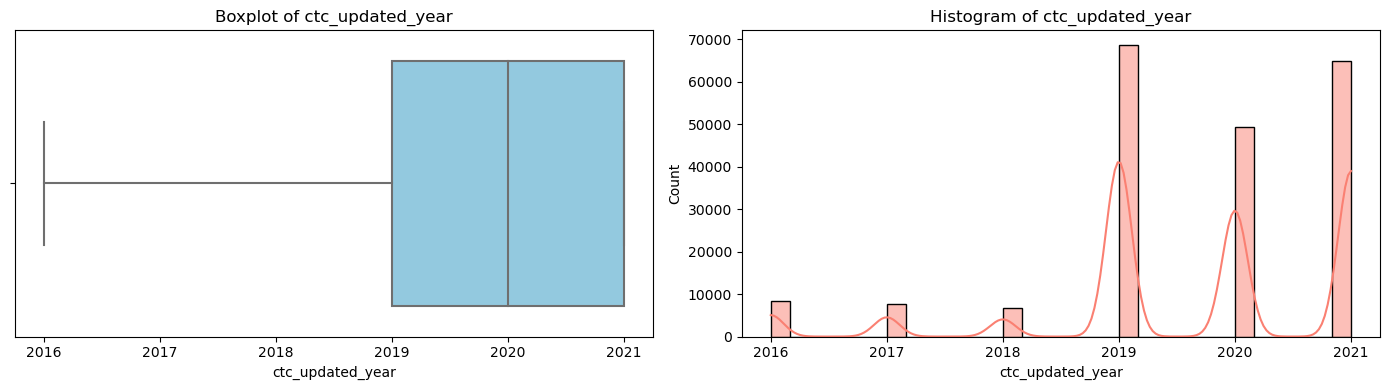

In [379]:
# Anomaly, Extreme or global outliers handling (numeric only)

# IQR-Based Capping
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower, lower,
                  np.where(df[column] > upper, upper, df[column]))
    return df

# Z-score capping
# from scipy.stats import zscore
# def cap_outliers_zscore(df, column, threshold=3):
#     z = zscore(df[column])
#     mean = df[column].mean()
#     std = df[column].std()
#     upper = mean + threshold * std
#     lower = mean - threshold * std
#     df[column] = np.where(df[column] > upper, upper,
#                   np.where(df[column] < lower, lower, df[column]))
#     return df

numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    df = cap_outliers_iqr(df, col)  # or cap_outliers_zscore

numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    # Boxplot
    sns.boxplot(x=df[col], ax=axes[0], color='skyblue')
    axes[0].set_title(f'Boxplot of {col}')
    # Histogram
    sns.histplot(df[col], bins=30, kde=True, ax=axes[1], color='salmon')
    axes[1].set_title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()

0.09997911029279596


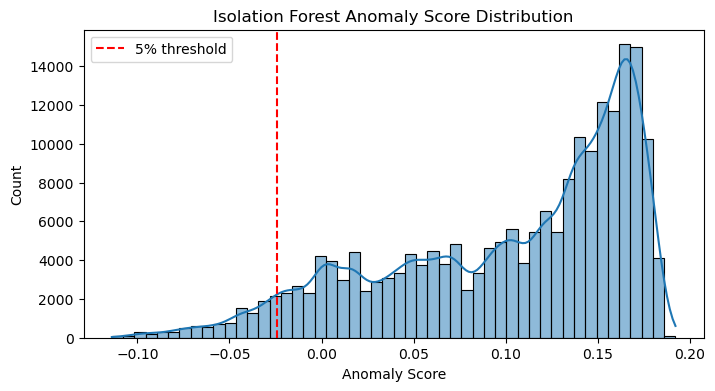

In [380]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import KNNImputer, SimpleImputer

numerical_cols = df.select_dtypes(include='number').columns

# IsolationForest Method
model = IsolationForest(contamination=0.10)
preds = model.fit_predict(df[numerical_cols])
df_iso_cleaned = df[preds == 1]  # -1 = outlier, 1 = inlier
print((len(df[iso_preds == -1])/len(df)).round(2))

# # LocalOutlierFactor Method
# df_temp = df.copy()  # Temporary imputation (for LOF to work)
# df_temp[numerical_cols] = pd.DataFrame(
#     SimpleImputer(strategy='median').fit_transform(df[numerical_cols]),
#     columns=numerical_cols)
# model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
# preds = model.fit_predict(df_temp[numerical_cols])  # -1 is outlier
# df_lof_cleaned = df.loc[preds == 1].reset_index(drop=True)


## Get anomaly scores
scores = model.decision_function(df[numerical_cols])  # higher = more normal
# preds = model.predict(df[numerical_cols])  # -1 = outlier, 1 = inlier
## Can manually choose a threshold
# threshold = np.percentile(scores, 5)  # bottom 5% = outliers
# preds_manual = (scores < threshold).astype(int)  # 1 = outlier, 0 = inlier
## Can attach results to original data
# df['iso_pred'] = iso_preds
# df['anomaly_score'] = anomaly_scores
## Can check stats to find differences
# outliers = df[iso_preds == -1]
# inliers = df[iso_preds != -1]
# outliers.describe() - inliers.describe()
# Can isualize anomaly score distribution
plt.figure(figsize=(8, 4))
sns.histplot(scores, bins=50, kde=True)
plt.axvline(np.percentile(scores, 5), color='red', linestyle='--', label='5% threshold')
plt.title('Isolation Forest Anomaly Score Distribution')
plt.xlabel('Anomaly Score')
plt.legend()
plt.show()

df = df_iso_cleaned.copy()

In [382]:
# flag values with frequency below a threshold

def flag_rare_categories(series, threshold=0.01):
    freq = series.value_counts(normalize=True)
    rare = freq[freq < threshold].index
    return series.isin(rare)

df['is_rare_category'] = flag_rare_categories(df['CategoryColumn'], threshold=0.01)


KeyError: 'CategoryColumn'

In [381]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(normalize=True).tail())  # show rare categories


Column: company_hash
wvustbxzx mhoxztoo otqcxwto      0.000005
svbbgz xzaxv rna                 0.000005
wvaa wtzntq                      0.000005
nqxumqvzao ntwyzgrgsj ucn rna    0.000005
wxowg ojntbo                     0.000005
Name: company_hash, dtype: float64

Column: job_position
Platform Engineer                  0.000007
Senior Analysts                    0.000007
Director Engineering               0.000007
Asp.Net developer                  0.000007
Software Development Engineer 1    0.000007
Name: job_position, dtype: float64


In [314]:


# # Step 4: KNN Imputer
# knn_imputer = KNNImputer(n_neighbors=5)
# df_imputed = pd.DataFrame(
#     knn_imputer.fit_transform(df_lof_cleaned[numerical_cols]),
#     columns=numerical_cols
# )
# df_imputed.head()


C:\Users\mayan\anaconda3\Lib\site-packages\sklearn\neighbors\_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


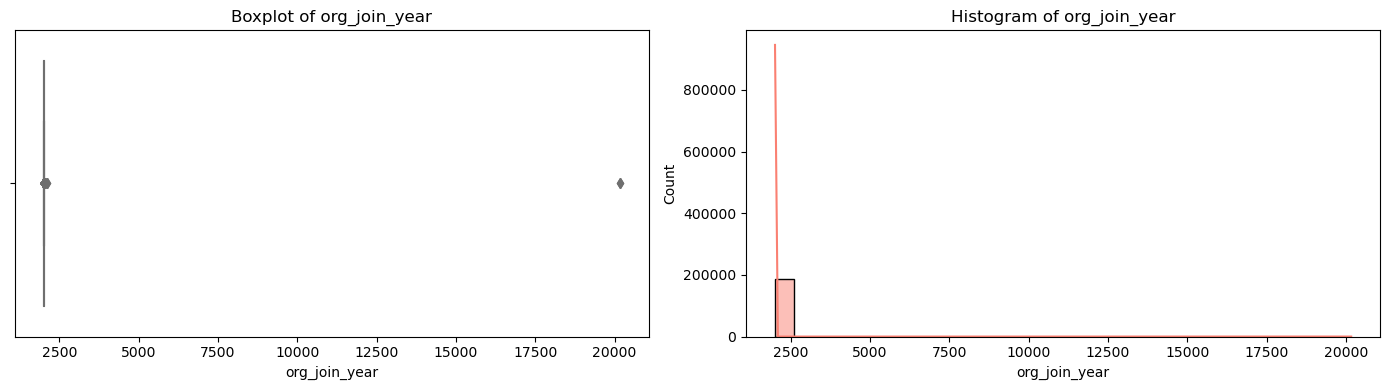

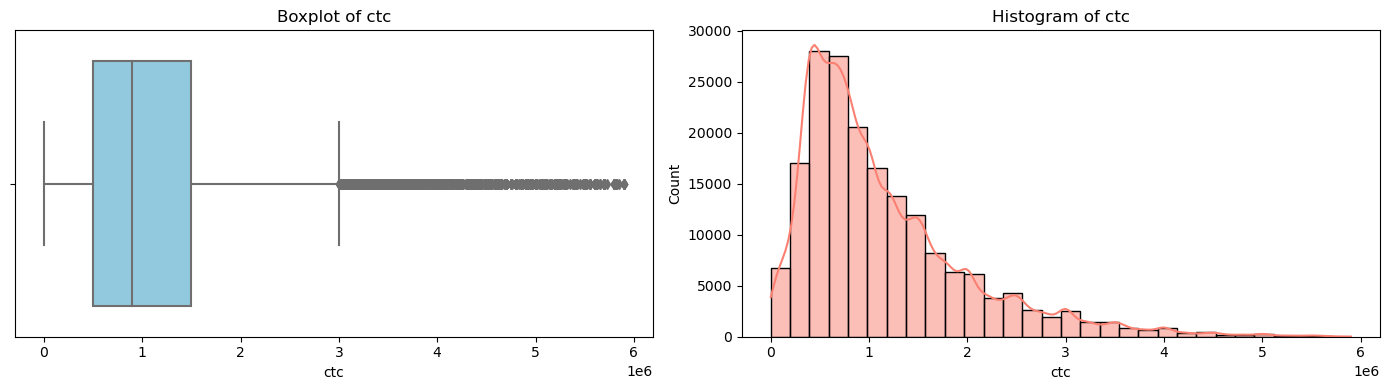

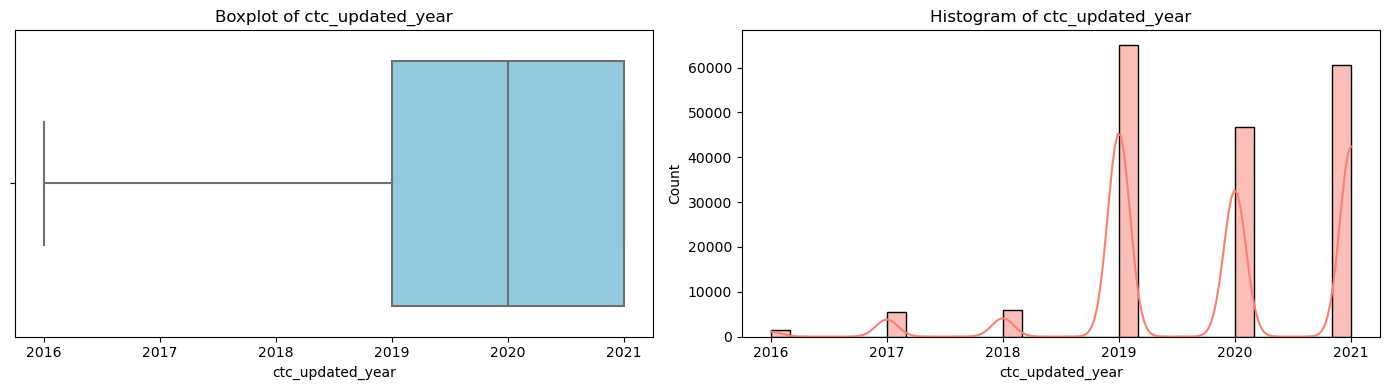

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df_lof_cleaned.select_dtypes(include='number').columns

for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # Boxplot
    sns.boxplot(x=df_iso[col], ax=axes[0], color='skyblue')
    axes[0].set_title(f'Boxplot of {col}')

    # Histogram
    sns.histplot(df_iso[col], bins=30, kde=True, ax=axes[1], color='salmon')
    axes[1].set_title(f'Histogram of {col}')

    plt.tight_layout()
    plt.show()


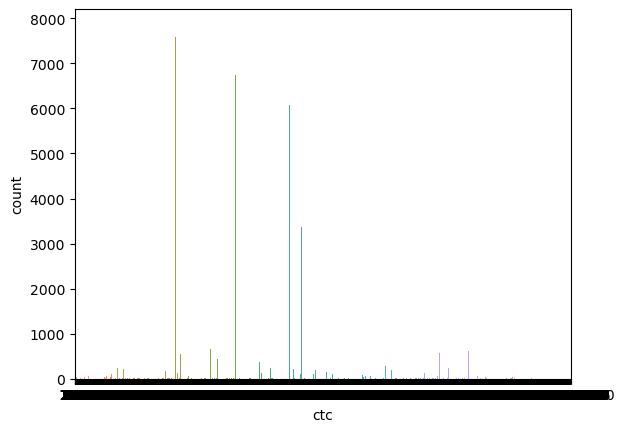

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='ctc', data=df)
plt.show()

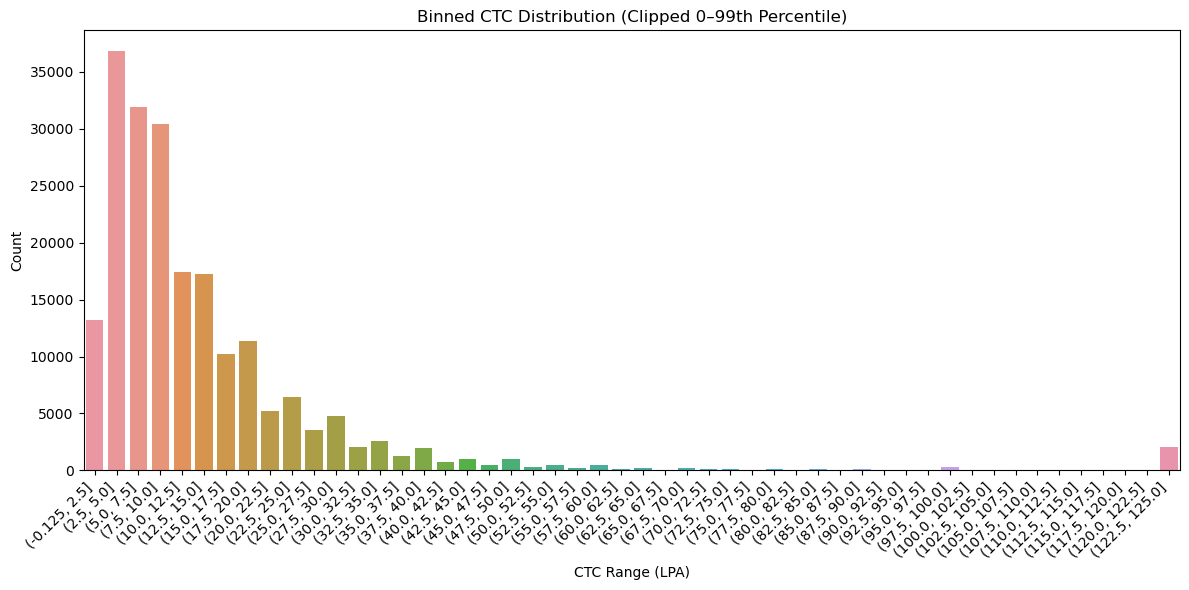

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# If df is a slice, reset to avoid SettingWithCopyWarning
df = df.copy()

# Scale CTC
df.loc[:, 'ctc'] = df['ctc'] / 10**5

# Clip CTC between 0 and 99th percentile
lower = df['ctc'].quantile(0.00)
upper = df['ctc'].quantile(0.99)

# bring outliers to lower and upper value
df.loc[:, 'ctc_clipped'] = df['ctc'].clip(lower, upper)  
# Create 50 bins
df['ctc_binned'] = pd.cut(df['ctc_clipped'], bins=50)

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='ctc_binned', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Binned CTC Distribution (Clipped 0–99th Percentile)')
plt.xlabel('CTC Range (LPA)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


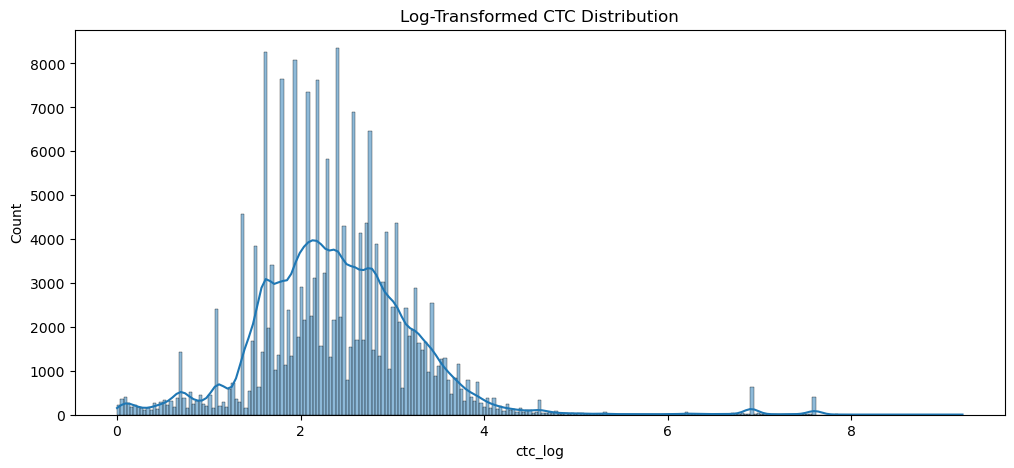

In [50]:
df['ctc_log'] = np.log1p(df['ctc'])
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.histplot(df['ctc_log'], kde=True)
plt.title('Log-Transformed CTC Distribution')
plt.show()

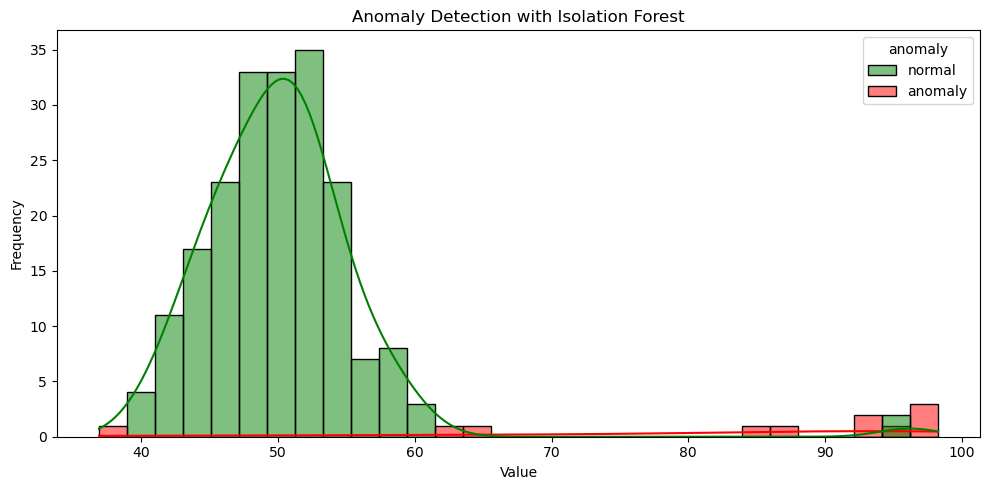

In [72]:
# 🌲 Isolation Forest
# Machine learning-based anomaly detection technique.
# Works by isolating observations in a tree structure.
# Multivariate: can detect outliers in high-dimensional feature space.
# Doesn’t assume normal distribution.

# ✅ Good when:
# You have complex or high-dimensional data.
# Anomalies are not just high/low values but strange combinations.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import seaborn as sns

# Create synthetic data
np.random.seed(42)
normal_data = np.random.normal(loc=50, scale=5, size=200)  # Normal data
anomalies = np.random.uniform(low=80, high=100, size=10)    # Anomalies
data = np.concatenate([normal_data, anomalies])

# Convert to DataFrame
df1 = pd.DataFrame(data, columns=['value'])

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df1['anomaly'] = iso_forest.fit_predict(df1[['value']])  # -1: anomaly, 1: normal
df1['anomaly'] = df1['anomaly'].map({1: 'normal', -1: 'anomaly'})

# Visualize
plt.figure(figsize=(10, 5))
sns.histplot(data=df1, x='value', hue='anomaly', bins=30, kde=True, palette={'normal': 'green', 'anomaly': 'red'})
plt.title('Anomaly Detection with Isolation Forest')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

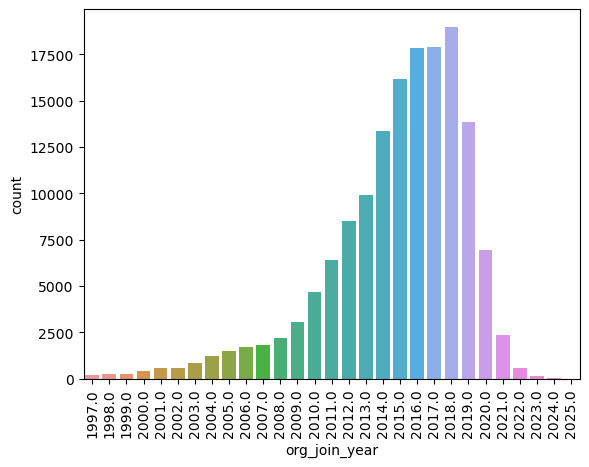

In [81]:
sns.countplot(x='org_join_year', data=df)
plt.xticks(rotation = 90)
plt.show()

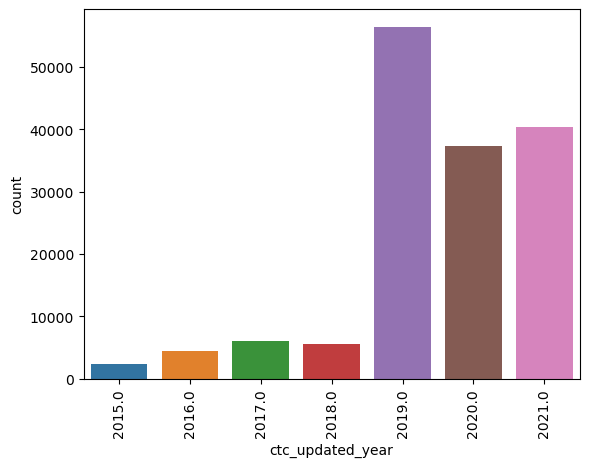

In [82]:
sns.countplot(x='ctc_updated_year', data=df)
plt.xticks(rotation = 90)
plt.show()

🔍 Step 1: Basic Summary of Missing Data

✅ Goal: Know how many missing values exist and where.

In [225]:
import pandas as pd

# Load your dataset
# df = pd.read_csv("your_dataset.csv")

# Summary of missing values
missing_counts = df.isnull().sum()
missing_percent = (df.isnull().mean() * 100).round(2).sort_values(ascending=False)

# missing_df = pd.DataFrame({
#     'Missing Count': missing_counts,
#     'Missing %': missing_percent
# }).sort_values(by="Missing %", ascending=False)

missing_counts


company_hash           44
org_join_year          86
ctc                     0
job_position        52562
ctc_updated_year        0
ctc_bins                0
dtype: int64

In [169]:
df.nunique()

company_hash        37299
org_join_year          77
ctc                  3360
job_position         1017
ctc_updated_year        7
is_missing              2
is_age_missing          2
dtype: int64

🧭 Step 2: Is the Missingness Random or Patterned?

1. Visualize Missingness: Use missingno to see if values are missing in patterns.

In [223]:
df.org_join_year.value_counts()

2018.0    25256
2019.0    23427
2017.0    23239
2016.0    23043
2015.0    20610
          ...  
2107.0        1
1972.0        1
2101.0        1
208.0         1
200.0         1
Name: org_join_year, Length: 77, dtype: int64

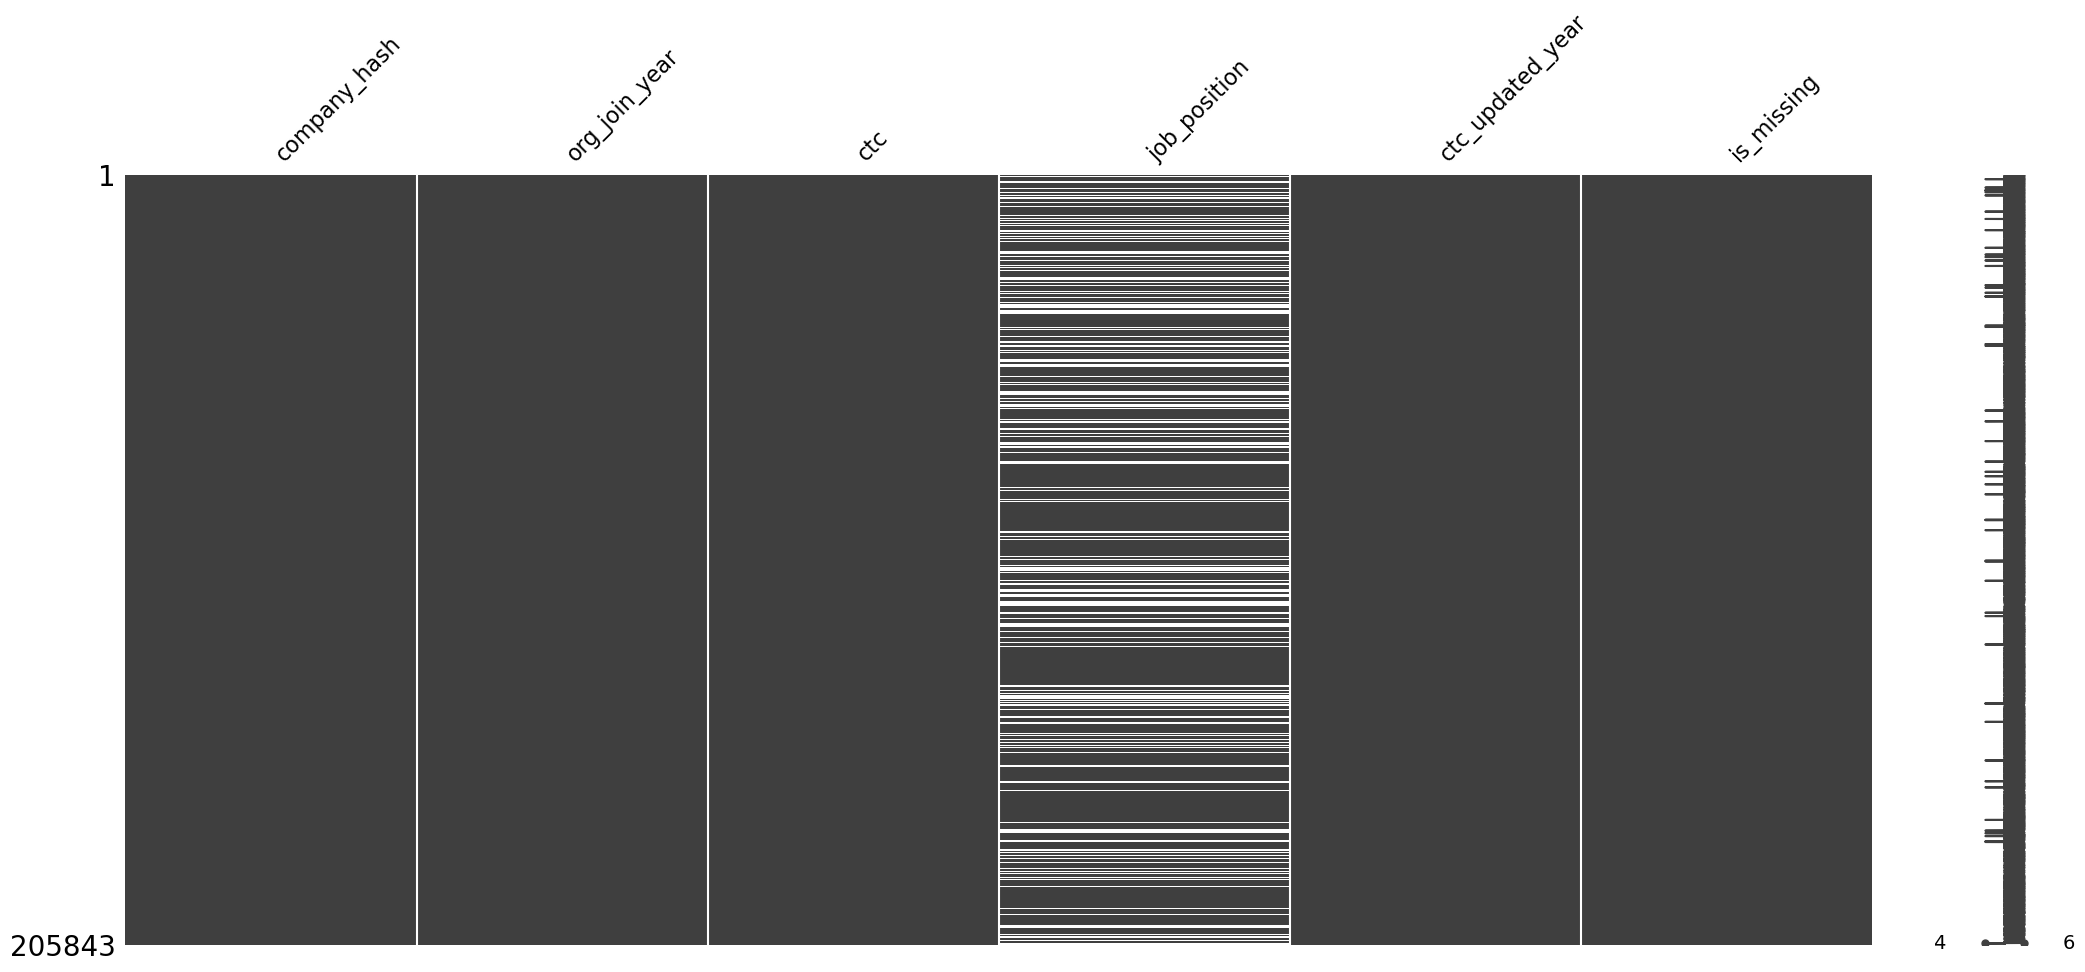

In [154]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

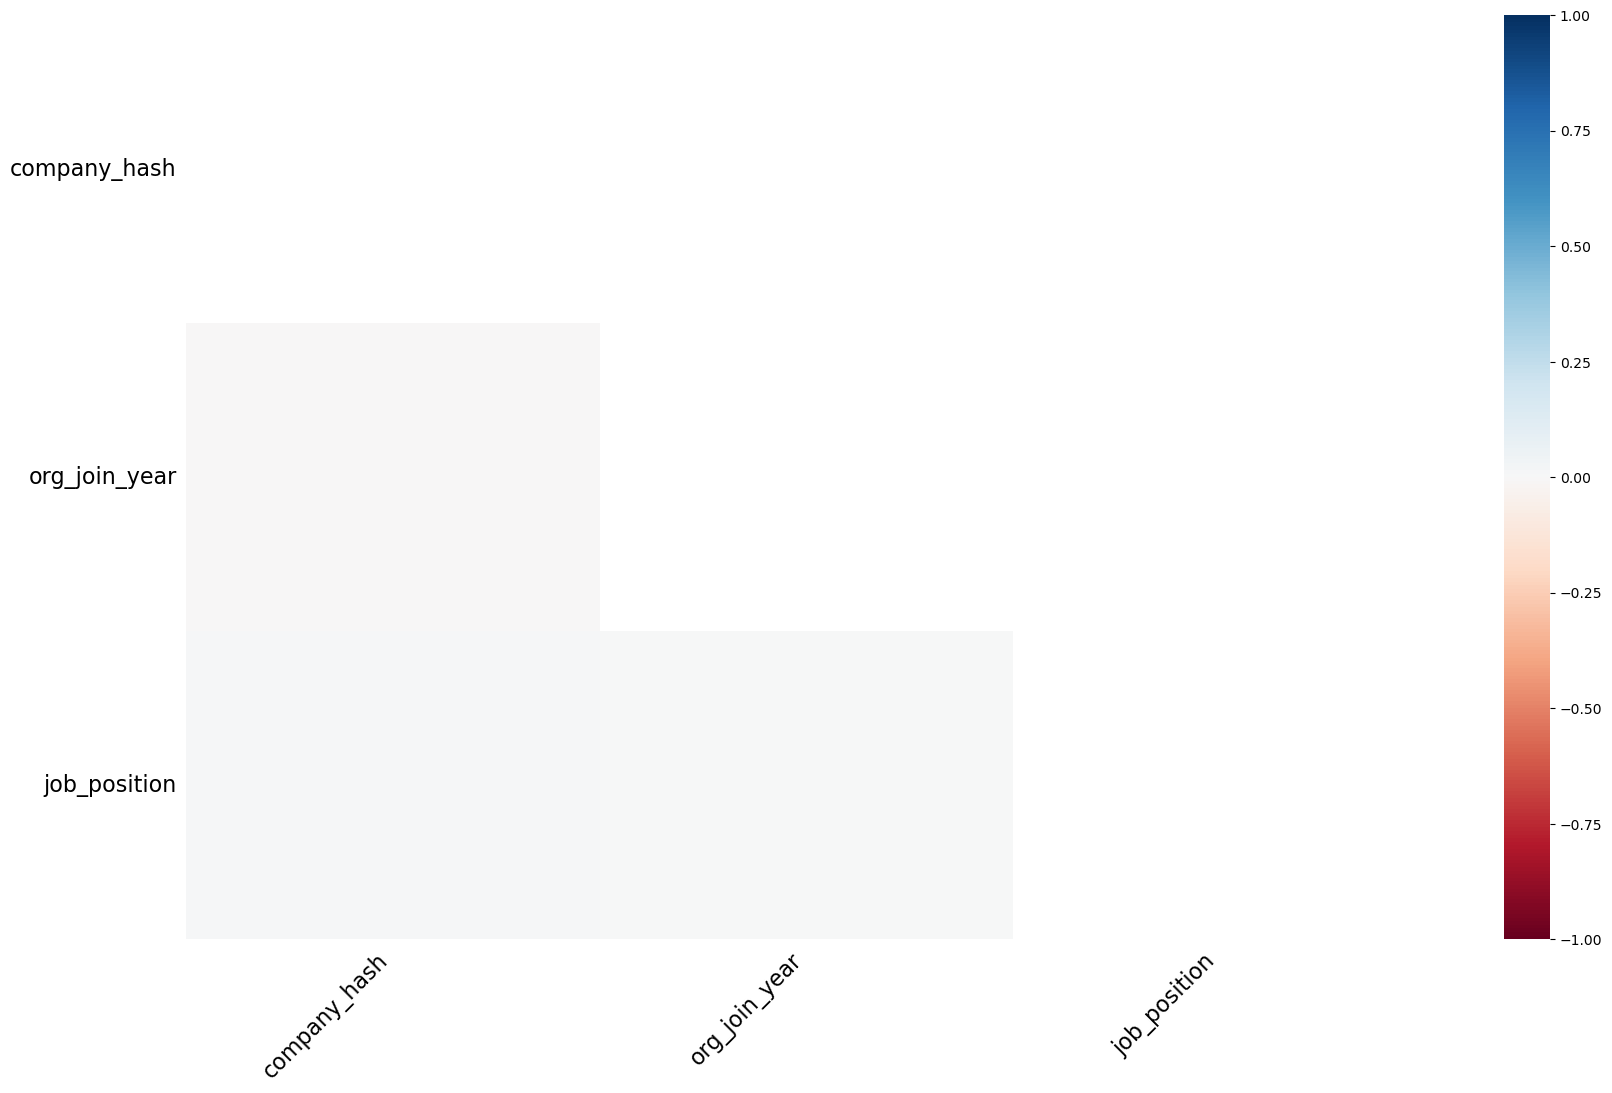

In [155]:
msno.heatmap(df)
plt.show()

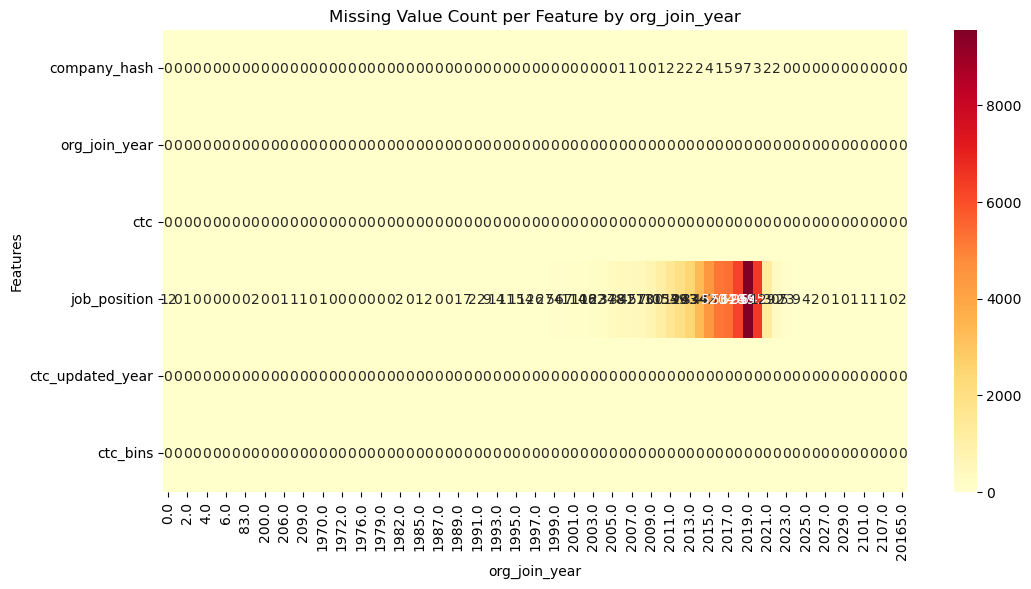

In [226]:
# Create a dataframe of missing values grouped by a category
group_col = 'org_join_year'  # or any categorical column
missing_by_cat = df.groupby(group_col).apply(lambda x: x.isnull().sum()).T

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_cat, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title(f"Missing Value Count per Feature by {group_col}")
plt.ylabel("Features")
plt.xlabel(group_col)
plt.show()


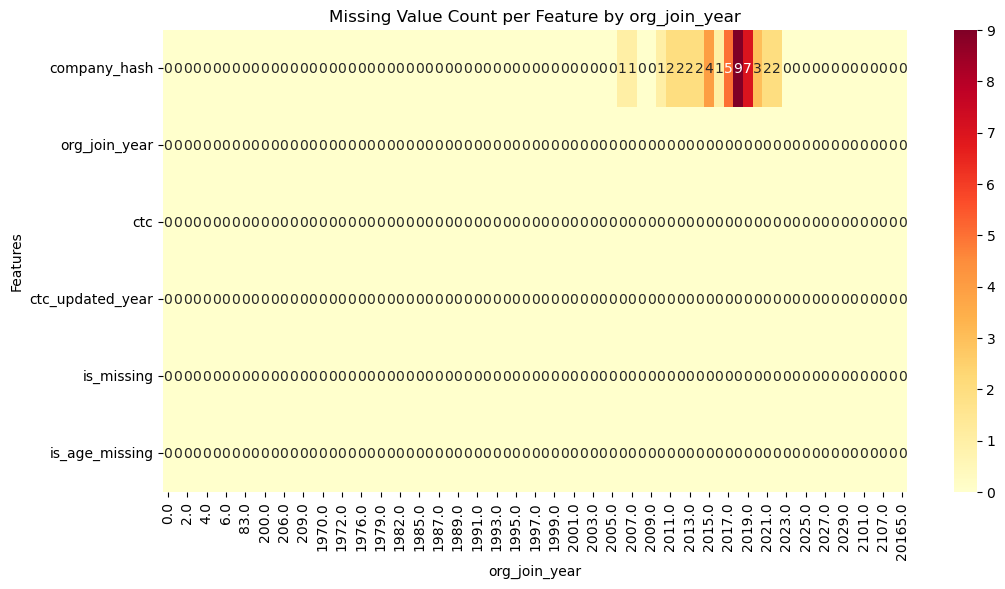

In [167]:
# Create a dataframe of missing values grouped by a category
group_col = 'org_join_year'  # or any categorical column
missing_by_cat = df.drop(['job_position'], axis=1).groupby(group_col).apply(lambda x: x.isnull().sum()).T

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_cat, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title(f"Missing Value Count per Feature by {group_col}")
plt.ylabel("Features")
plt.xlabel(group_col)
plt.show()


In [183]:
df.columns

Index(['company_hash', 'org_join_year', 'ctc', 'job_position',
       'ctc_updated_year'],
      dtype='object')

In [187]:
df.groupby('ctc_updated_year')[df.columns].count()

,company_hash,org_join_year,ctc,job_position,ctc_updated_year
ctc_updated_year,,,,,
2015.0,2927,2926,2927,2400,2927
2016.0,5498,5501,5501,4467,5501
2017.0,7559,7556,7561,6137,7561
2018.0,6742,6735,6746,5650,6746
2019.0,68676,68666,68688,56819,68688
2020.0,49436,49405,49444,37375,49444
2021.0,64961,64968,64976,40433,64976


In [201]:
non_null_pct = df.groupby('ctc_updated_year')[df.columns].count()

In [200]:
non_null_pct

ctc_updated_year
2015.0     2927
2016.0     5501
2017.0     7561
2018.0     6746
2019.0    68688
2020.0    49444
2021.0    64976
dtype: int64

In [203]:
# Total count in each group
group_size = df.groupby('ctc_updated_year').size().to_frame('group_total')

# Non-null count per column per group
non_null_counts = df.groupby('ctc_updated_year')[df.columns].count()

# Merge with group size and calculate percentage
non_null_pct = non_null_counts.div(group_size['group_total'], axis=0) * 100

# Optional: round for readability
non_null_pct = non_null_pct.astype(int)

non_null_pct

,company_hash,org_join_year,ctc,job_position,ctc_updated_year
ctc_updated_year,,,,,
2015.0,100,99,100,81,100
2016.0,99,100,100,81,100
2017.0,99,99,100,81,100
2018.0,99,99,100,83,100
2019.0,99,99,100,82,100
2020.0,99,99,100,75,100
2021.0,99,99,100,62,100


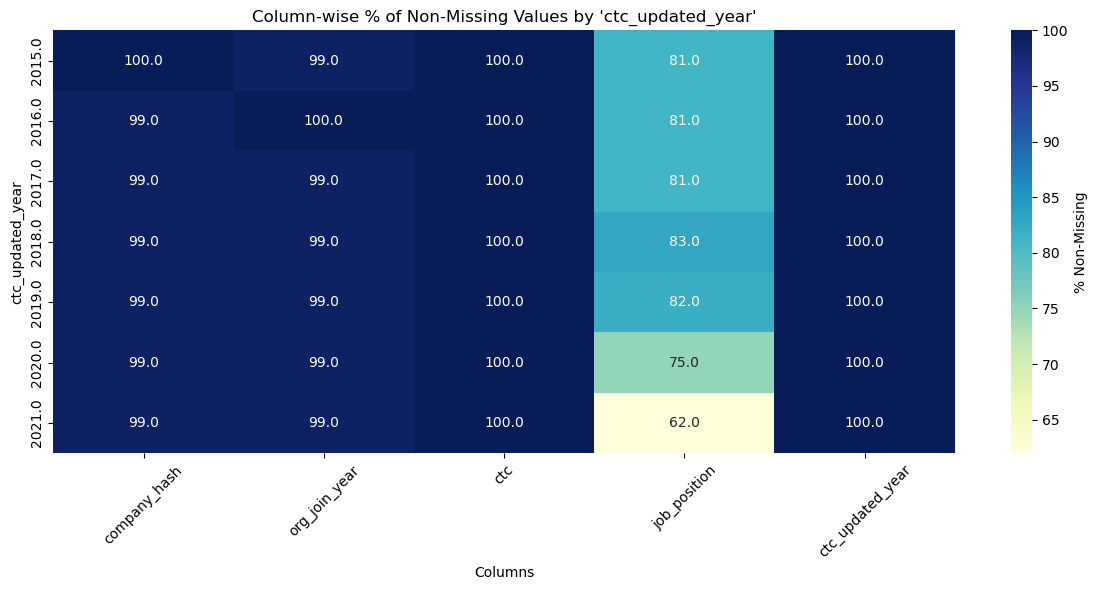

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `non_null_pct` is already calculated as in previous step

plt.figure(figsize=(12, 6))
sns.heatmap(non_null_pct, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': '% Non-Missing'})
plt.title("Column-wise % of Non-Missing Values by 'ctc_updated_year'")
plt.ylabel("ctc_updated_year")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [215]:
a = df[df['ctc_updated_year']==2021]

In [220]:
from sklearn.preprocessing import KBinsDiscretizer
X = df[['ctc']]
est = KBinsDiscretizer(
    n_bins=10, encode='ordinal', strategy='quantile'
)
est.fit(X)
KBinsDiscretizer(...)
Xt = est.transform(X)
df['ctc_bins'] = Xt

In [221]:
# Total count in each group
group_size = df.groupby('ctc_bins').size().to_frame('group_total')

# Non-null count per column per group
non_null_counts = df.groupby('ctc_bins')[df.columns].count()

# Merge with group size and calculate percentage
non_null_pct = non_null_counts.div(group_size['group_total'], axis=0) * 100

# Optional: round for readability
non_null_pct = non_null_pct.astype(int)

non_null_pct

,company_hash,org_join_year,ctc,job_position,ctc_updated_year,ctc_bins
ctc_bins,,,,,,
0.0,99,99,100,71,100,100
1.0,99,99,100,68,100,100
2.0,99,99,100,70,100,100
3.0,99,99,100,72,100,100
4.0,99,99,100,75,100,100
5.0,99,99,100,75,100,100
6.0,99,99,100,76,100,100
7.0,99,99,100,76,100,100
8.0,99,99,100,76,100,100


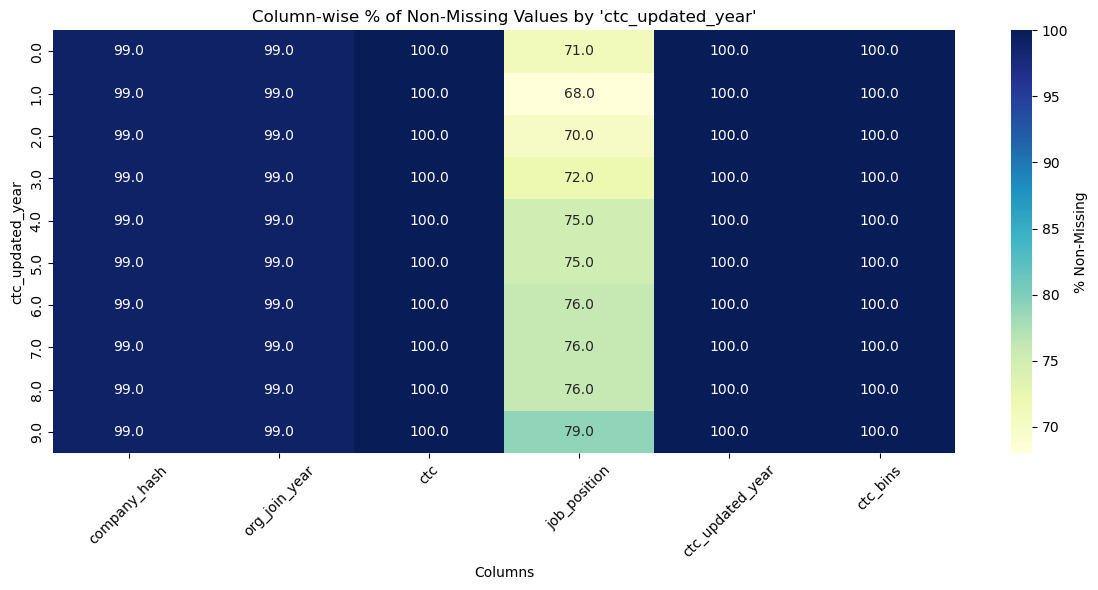

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `non_null_pct` is already calculated as in previous step

plt.figure(figsize=(12, 6))
sns.heatmap(non_null_pct, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': '% Non-Missing'})
plt.title("Column-wise % of Non-Missing Values by 'ctc_updated_year'")
plt.ylabel("ctc_updated_year")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

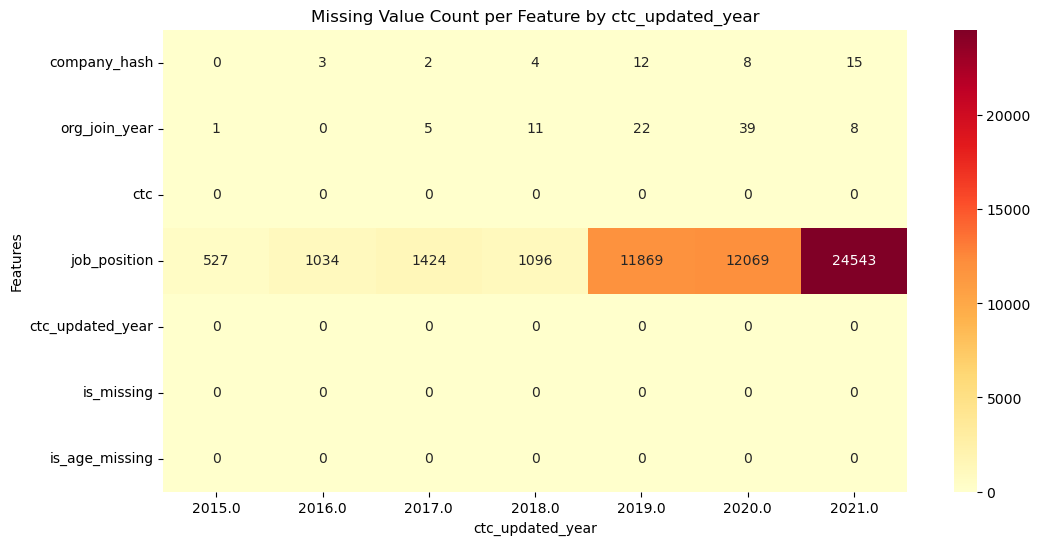

In [174]:
# Create a dataframe of missing values grouped by a category
group_col = 'ctc_updated_year'  # or any categorical column
missing_by_cat = df.groupby(group_col).apply(lambda x: x.isnull().sum()).T

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_cat, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title(f"Missing Value Count per Feature by {group_col}")
plt.ylabel("Features")
plt.xlabel(group_col)
plt.show()


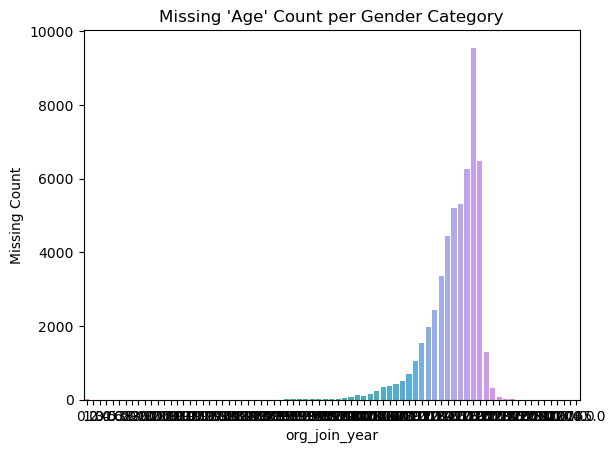

In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Count of missing 'Age' for each 'Gender' category
df['is_age_missing'] = df['job_position'].isnull()

missing_by_gender = df.groupby('org_join_year')['is_age_missing'].sum().reset_index()

# Plot
sns.barplot(data=missing_by_gender, x='org_join_year', y='is_age_missing')
plt.title("Missing 'Age' Count per Gender Category")
plt.ylabel("Missing Count")
plt.show()


2. Statistical Test for Missingness

Use Little's MCAR test to statistically check if data is Missing Completely At Random (MCAR). Available via statsmodels or missingpy. For now, use this workaround for pattern-based logic:

In [141]:
# Compare distributions where a variable is missing vs not missing
missing_col = "job_position"

df["is_missing"] = df[missing_col].isnull()

# Compare another column's values based on missingness of FeatureX
df.groupby("is_missing")["org_join_year"].value_counts(normalize=True)


is_missing  org_join_year
False       2018.0           0.124051
            2017.0           0.117016
            2016.0           0.116428
            2015.0           0.105600
            2019.0           0.090537
                               ...   
True        2028.0           0.000019
            2031.0           0.000019
            2101.0           0.000019
            2106.0           0.000019
            2107.0           0.000019
Name: org_join_year, Length: 124, dtype: float64

In [144]:
# Check if missing values are concentrated in a category
df[df["job_position"].isnull()].groupby("org_join_year").size()


org_join_year
0.0          12
2.0           1
91.0          2
206.0         1
208.0         1
209.0         1
1970.0        1
1982.0        2
1985.0        1
1986.0        2
1989.0        1
1990.0        7
1991.0       22
1992.0        9
1993.0       14
1994.0       11
1995.0       15
1996.0       14
1997.0       26
1998.0       27
1999.0       54
2000.0       67
2001.0      114
2002.0      108
2003.0      162
2004.0      237
2005.0      348
2006.0      381
2007.0      427
2008.0      513
2009.0      700
2010.0     1053
2011.0     1549
2012.0     1963
2013.0     2434
2014.0     3342
2015.0     4430
2016.0     5204
2017.0     5310
2018.0     6249
2019.0     9555
2020.0     6476
2021.0     1292
2022.0      305
2023.0       73
2024.0        9
2025.0        4
2026.0        2
2028.0        1
2031.0        1
2101.0        1
2106.0        1
2107.0        1
20165.0       2
dtype: int64

### String Columns Processing

In [52]:
import re
def preprocess_string(string):
 new_string= re.sub('[^A-Za-z ]+', '', string).lower().strip()
 return new_string

mystring='\tAirtel\\\\&&**() X Labs'
preprocess_string(mystring)

'airtel x labs'

In [53]:
df["company_hash"] = df["company_hash"].apply(lambda x: preprocess_string(str(x)))
df["company_hash"].nunique()

36982

In [63]:
df["job_position"] = df["job_position"].apply(lambda x: preprocess_string(str(x)))
df["job_position"].nunique()

856

In [ ]:
# removing the records where company or job_position reocords are not available 

In [66]:
len(df[((df["company_hash"] == "") | (df["job_position"] == ""))])

96

In [70]:
len(df[((df["company_hash"] == "nan") | (df["job_position"] == "nan"))])

52425

In [71]:
df = df[~((df["company_hash"] == "") | (df["job_position"] == "") | (df["company_hash"] == "nan") | (df["job_position"] == "nan"))]
df

,company_hash,org_join_year,ctc,job_position,ctc_updated_year,ctc_clipped,ctc_binned,ctc_log
0,atrgxnnt xzaxv,2016.0,11.00000,other,2020.0,11.00000,"(10.0, 12.5]",2.484907
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,4.49999,fullstack engineer,2019.0,4.49999,"(2.5, 5.0]",1.704746
2,ojzwnvwnxw vx,2015.0,20.00000,backend engineer,2020.0,20.00000,"(17.5, 20.0]",3.044522
3,ngpgutaxv,2017.0,7.00000,backend engineer,2019.0,7.00000,"(5.0, 7.5]",2.079442
4,qxen sqghu,2017.0,14.00000,fullstack engineer,2019.0,14.00000,"(12.5, 15.0]",2.708050
...,...,...,...,...,...,...,...,...
205324,wos xzntqzvnxgzvr,2016.0,15.00000,fullstack engineer,2021.0,15.00000,"(12.5, 15.0]",2.772589
205326,xzegojo,2019.0,12.00000,fullstack engineer,2021.0,12.00000,"(10.0, 12.5]",2.564949
205327,wgbuzgcv wgznqvwn,2015.0,10.00000,data scientist,2021.0,10.00000,"(7.5, 10.0]",2.397895
205328,ahzzyhbmj,2019.0,11.00000,data scientist,2021.0,11.00000,"(10.0, 12.5]",2.484907


### Missing Value Treatment

In [122]:
df['job_position'] = df['job_position'].fillna('Others')
df['company_hash'] = df['company_hash'].fillna('Others')

### Outliers Treatment

### Feature Engineering

In [ ]:
# Masked company name to "Others" having count less than 5

In [84]:
df.loc[df.groupby("company_hash")["ctc"].transform("count") < 5,"company_hash"] = "Others"

In [85]:
(df["company_hash"] == "Others").sum()

40449

In [89]:
df['company_hash'].value_counts()

Others                       40449
nvnv wgzohrnvzwj otqcxwto     5301
xzegojo                       3442
vbvkgz                        2575
wgszxkvzn                     2095
                             ...  
zg                               5
vqqgf trtwnqgzxwo                5
bgmxogen xzegntwy                5
lbq xzegntwy                     5
qxkkrt                           5
Name: company_hash, Length: 3035, dtype: int64

In [120]:
df["experience_in_org"] = 2025 - df["org_join_year"]

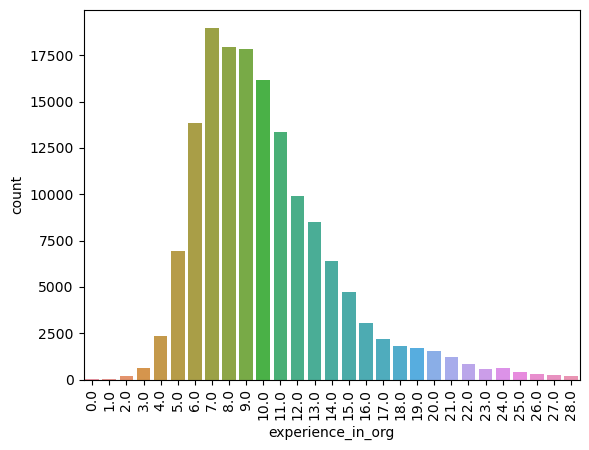

In [121]:
sns.countplot(x='experience_in_org', data=df)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Manual Clustering based on Company , Job position and Years of experience